# Deep Learning Lab 1

### Name : Lokendra Sinha
### Roll no : 32
### Batch : A2

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Load the dataset
file_path = 'Insurance Costs - Insurance Costs.xlsx'
data = pd.read_excel(file_path)

Data Overview:
    person_id   age     sex     bmi  children smoker     region  total_charges
0          1  19.0  female  27.900         0    yes  southwest     16884.9240
1          2  18.0    male  33.770         1     no  southeast      1725.5522
2          3  28.0    male  33.000         3     no  southeast      4449.4620
3          4  33.0    male  22.705         0     no  northwest     21984.4700
4          5  32.0    male  28.880         0     no  northwest      3866.8552

Summary:
          person_id          age          bmi     children  total_charges
count  1338.000000  1337.000000  1334.000000  1338.000000    1338.000000
mean    669.500000    39.219147    30.659981     1.094918   13270.422274
std     386.391641    14.048217     6.100145     1.205493   12110.011244
min       1.000000    18.000000    15.960000     0.000000    1121.873900
25%     335.250000    27.000000    26.296250     0.000000    4740.287000
50%     669.500000    39.000000    30.380000     1.000000    9382.0

C:\Users\LOKENDRA SINHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


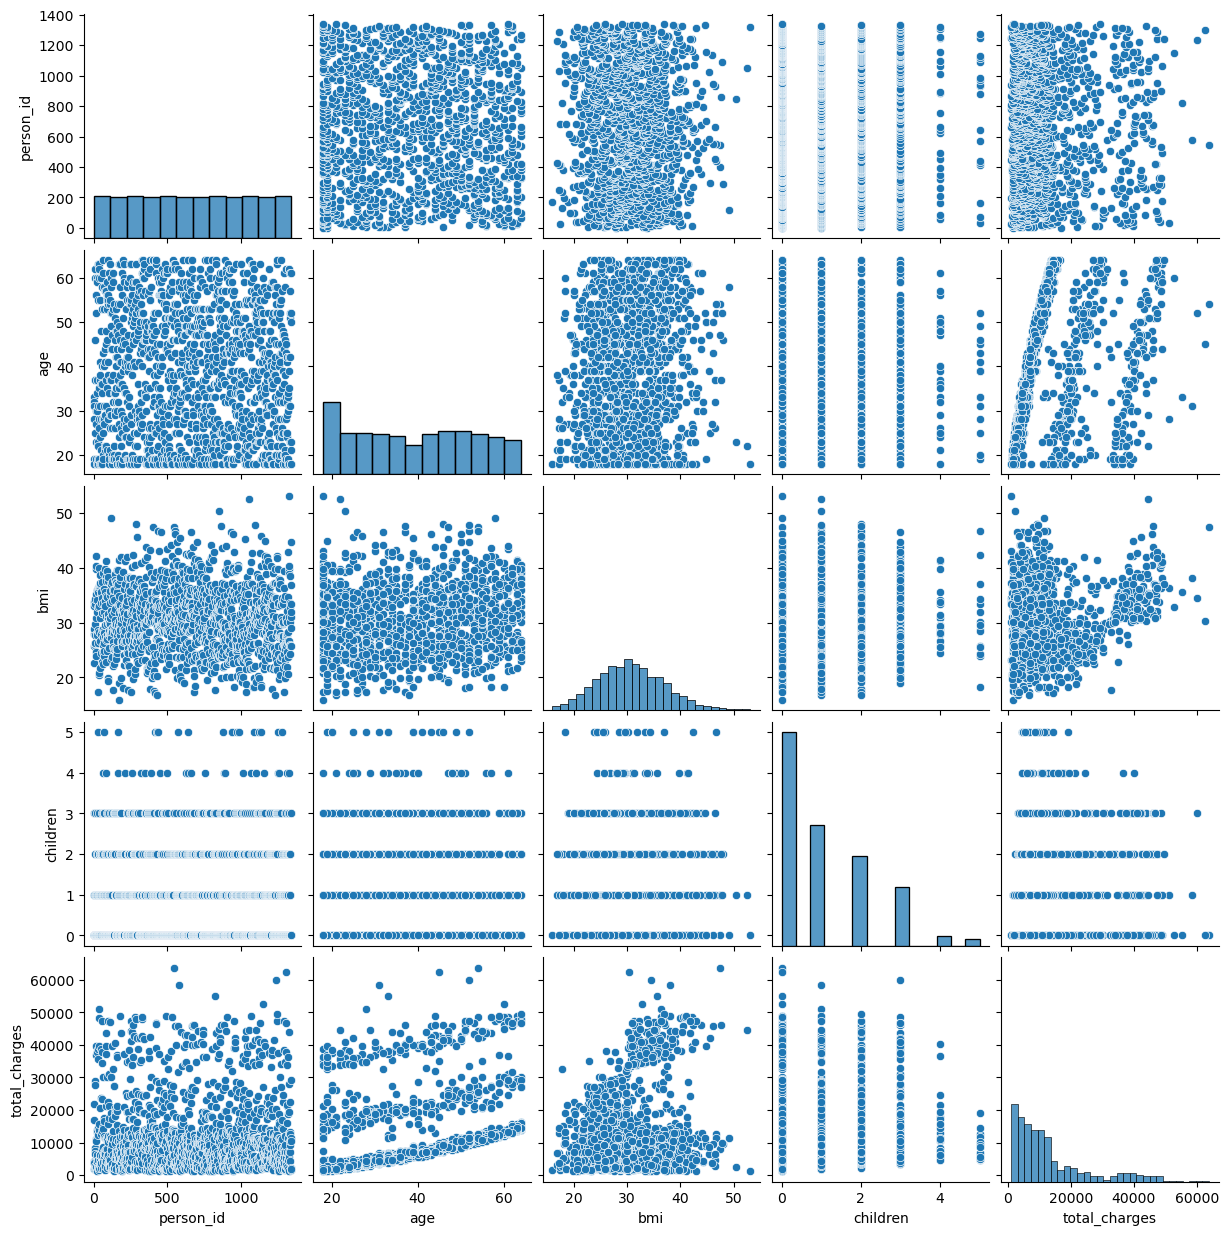

In [4]:
# Perform EDA
print("Data Overview:\n", data.head())
print("\nSummary:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())
sns.pairplot(data)
plt.show()

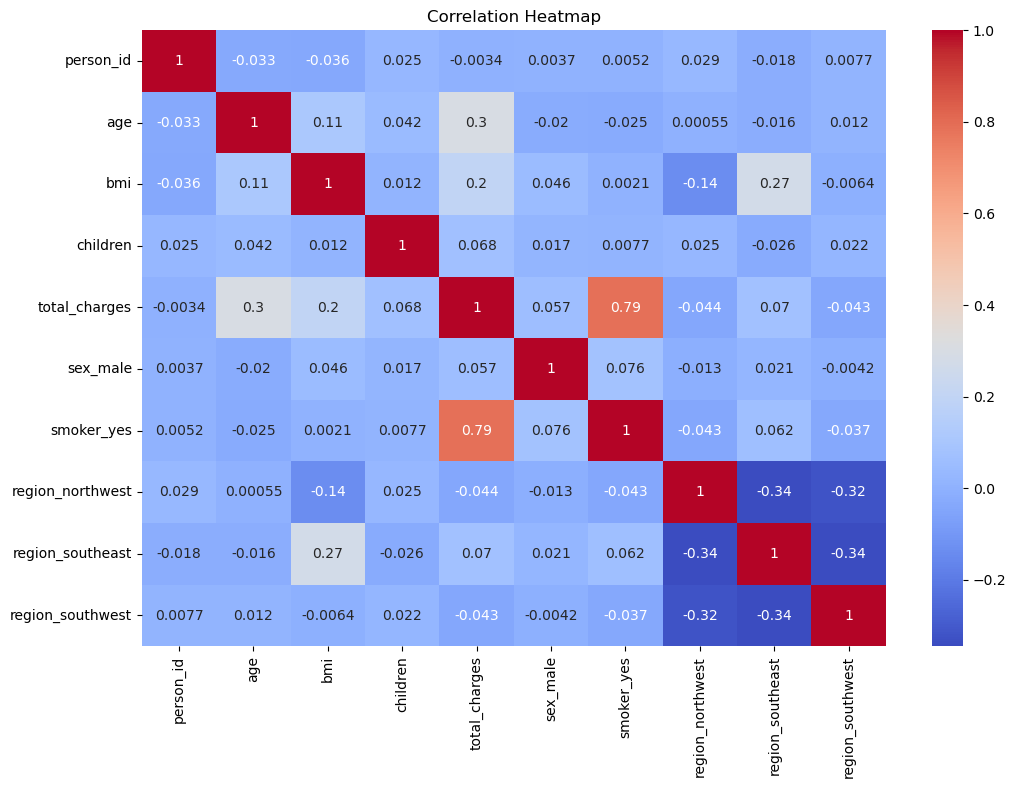

In [6]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Check correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Assuming 'data' is your DataFrame and 'insurance_cost' is the target variable

# Feature Selection
X = data.drop('total_charges', axis=1)  # Replace with actual target column name
y = data['total_charges']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
X_train['age'].fillna(X_train['age'].median(), inplace=True)
X_test['age'].fillna(X_train['age'].median(), inplace=True)

X_train['bmi'].fillna(X_train['bmi'].median(), inplace=True)
X_test['bmi'].fillna(X_train['bmi'].median(), inplace=True)

X_train['smoker'].fillna(X_train['smoker'].mode()[0], inplace=True)
X_test['smoker'].fillna(X_train['smoker'].mode()[0], inplace=True)

X_train['region'].fillna(X_train['region'].mode()[0], inplace=True)
X_test['region'].fillna(X_train['region'].mode()[0], inplace=True)

# Encode categorical variables
X_train['sex'] = X_train['sex'].map({'male': 1, 'female': 0})
X_test['sex'] = X_test['sex'].map({'male': 1, 'female': 0})

X_train['smoker'] = X_train['smoker'].map({'yes': 1, 'no': 0})
X_test['smoker'] = X_test['smoker'].map({'yes': 1, 'no': 0})

# One-hot encode the 'region' column
X_train = pd.get_dummies(X_train, columns=['region'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['region'], drop_first=True)

# Ensure both train and test sets have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Experiment with Perceptron
perceptron_model = Sequential([
    Dense(1, activation='linear', input_dim=X_train.shape[1])
])

perceptron_model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

history_perceptron = perceptron_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


C:\Users\LOKENDRA SINHA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 265187728.0000 - mae: 11675.2812 - val_loss: 109657392.0000 - val_mae: 6696.1699
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102464520.0000 - mae: 6439.5771 - val_loss: 53922308.0000 - val_mae: 4452.2871
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54187352.0000 - mae: 4395.0698 - val_loss: 39377836.0000 - val_mae: 4132.2769
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39878884.0000 - mae: 4082.5247 - val_loss: 35380612.0000 - val_mae: 4117.7725
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36915048.0000 - mae: 4059.3838 - val_loss: 34389588.0000 - val_mae: 4159.6860
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38289572.0000 - mae: 4189.8525 - val_loss: 34148780.0000 - val_mae: 4206.6123
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38759912.0000 - mae: 4283.5132 - val_loss: 34028276.0000 - val_mae: 4192.5991
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

In [13]:
# Evaluate the perceptron model
perceptron_predictions = perceptron_model.predict(X_test)
print("Perceptron RMSE:", np.sqrt(mean_squared_error(y_test, perceptron_predictions)))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Perceptron RMSE: 5818.3909541349785


In [14]:
# Experiment with different DNN architectures
architectures = [
    [64, 32, 16],
    [128, 64, 32],
    [256, 128, 64, 32],
    [512,256, 128, 64, 32]
]

results = []

for arch in architectures:
    model = Sequential()
    model.add(Dense(arch[0], activation='relu', input_dim=X_train.shape[1]))
    for units in arch[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    predictions = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results.append({
        "Architecture": arch,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

Epoch 1/50


C:\Users\LOKENDRA SINHA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 304480064.0000 - mae: 13046.9746 - val_loss: 323369600.0000 - val_mae: 12966.2373
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 326283968.0000 - mae: 13501.8086 - val_loss: 323164768.0000 - val_mae: 12959.0088
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 304744704.0000 - mae: 12970.3516 - val_loss: 322476352.0000 - val_mae: 12936.1377
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 308505152.0000 - mae: 13022.8320 - val_loss: 320541408.0000 - val_mae: 12875.6035
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 340981568.0000 - mae: 13761.7012 - val_loss: 315986784.0000 - val_mae: 12739.7988
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 339243104.0000 - mae: 13529.8154 - val_loss: 307036192.0000 - val_mae: 12478.7451
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 315563840.0000 - mae: 13063.1182 - val_loss: 291305120.0000 - val_mae: 12021.5537
Epoch 8/50
34/34 ━━━━━━━━━━━━━

C:\Users\LOKENDRA SINHA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 337116544.0000 - mae: 13572.2822 - val_loss: 323251360.0000 - val_mae: 12962.4189
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 313121952.0000 - mae: 13206.9453 - val_loss: 322001536.0000 - val_mae: 12922.8906
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 319465664.0000 - mae: 13140.2559 - val_loss: 316297408.0000 - val_mae: 12752.3867
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 314638464.0000 - mae: 13108.9424 - val_loss: 298672608.0000 - val_mae: 12240.4932
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 295057728.0000 - mae: 12490.2363 - val_loss: 258979200.0000 - val_mae: 11071.2793
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 274011232.0000 - mae: 11617.6768 - val_loss: 193465120.0000 - val_mae: 9080.7617
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 159815792.0000 - mae: 8422.0166 - val_loss: 116139720.0000 - val_mae: 6763.6064
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━

C:\Users\LOKENDRA SINHA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 303625568.0000 - mae: 13131.7256 - val_loss: 322350528.0000 - val_mae: 12931.4512
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 315317376.0000 - mae: 13117.2715 - val_loss: 300459808.0000 - val_mae: 12232.5967
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 269207360.0000 - mae: 11794.4355 - val_loss: 158477648.0000 - val_mae: 7794.7393
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 107446008.0000 - mae: 6568.3604 - val_loss: 58236400.0000 - val_mae: 6631.0566
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49521860.0000 - mae: 5786.1919 - val_loss: 39990316.0000 - val_mae: 5087.6929
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37349276.0000 - mae: 4638.0078 - val_loss: 34851788.0000 - val_mae: 4521.1362
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35229556.0000 - mae: 4244.2124 - val_loss: 32684754.0000 - val_mae: 4243.5967
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

C:\Users\LOKENDRA SINHA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 314847424.0000 - mae: 13112.7881 - val_loss: 319151232.0000 - val_mae: 12826.6270
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 327668736.0000 - mae: 13208.2754 - val_loss: 143345296.0000 - val_mae: 7415.5913
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 97409520.0000 - mae: 6891.8389 - val_loss: 45069152.0000 - val_mae: 5288.8945
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40633236.0000 - mae: 4770.7393 - val_loss: 34064512.0000 - val_mae: 4216.3325
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35481348.0000 - mae: 4079.2148 - val_loss: 31035362.0000 - val_mae: 3914.4636
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33511956.0000 - mae: 3810.6196 - val_loss: 30358810.0000 - val_mae: 3832.1851
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33347016.0000 - mae: 3813.7793 - val_loss: 29474804.0000 - val_mae: 3729.1099
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

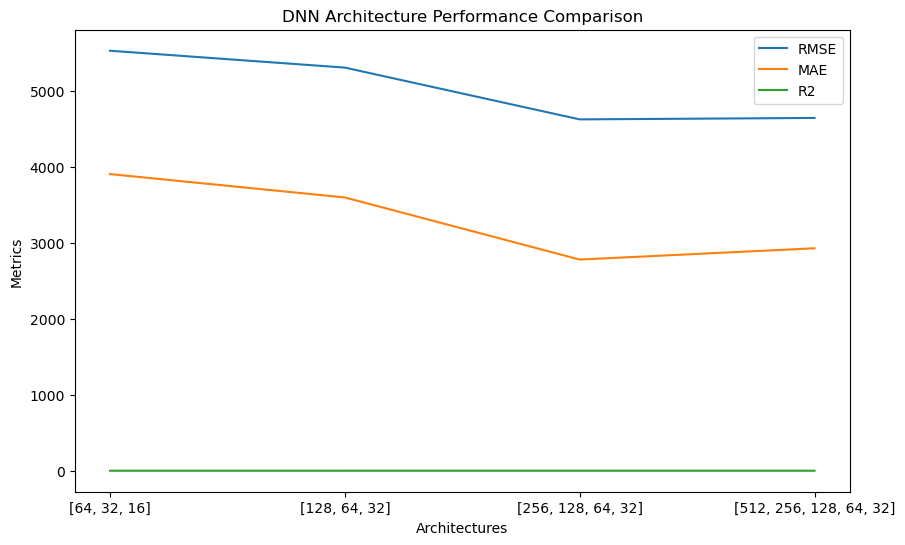

In [15]:
# Visualize DNN Architecture Results
dnn_results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
for metric in ["RMSE", "MAE", "R2"]:
    plt.plot(dnn_results_df["Architecture"].astype(str), dnn_results_df[metric], label=metric)
plt.xlabel("Architectures")
plt.ylabel("Metrics")
plt.title("DNN Architecture Performance Comparison")
plt.legend()
plt.show()

In [16]:
X_train = pd.DataFrame(X_train).fillna(X_train.mean())
X_test = pd.DataFrame(X_test).fillna(X_test.mean())
y_train = pd.Series(y_train).fillna(y_train.mean())
y_test = pd.Series(y_test).fillna(y_test.mean())


In [17]:
# Experiment with optimizers
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
}

In [18]:
optimizer_results = []

In [20]:
# Check for NaN values in the datasets
print("Checking for NaN values in X_train:", np.isnan(X_train).any())
print("Checking for NaN values in X_test:", np.isnan(X_test).any())
print("Checking for NaN values in y_train:", np.isnan(y_train).any())
print("Checking for NaN values in y_test:", np.isnan(y_test).any())

Checking for NaN values in X_train: 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool
Checking for NaN values in X_test: 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool
Checking for NaN values in y_train: False
Checking for NaN values in y_test: False


In [22]:
# Handle missing values in X_train and X_test
# Example: Fill NaN values with the median for numerical features
X_train = pd.DataFrame(X_train)  # Convert back to DataFrame if necessary
X_test = pd.DataFrame(X_test)

# Assuming 'age' and 'bmi' are numerical features
X_train['age'].fillna(X_train['age'].median(), inplace=True)
X_test['age'].fillna(X_train['age'].median(), inplace=True)

X_train['bmi'].fillna(X_train['bmi'].median(), inplace=True)
X_test['bmi'].fillna(X_train['bmi'].median(), inplace=True)

# Assuming 'smoker' and 'region' are categorical features
X_train['smoker'].fillna(X_train['smoker'].mode()[0], inplace=True)
X_test['smoker'].fillna(X_train['smoker'].mode()[0], inplace=True)

X_train['region'].fillna(X_train['region'].mode()[0], inplace=True)
X_test['region'].fillna(X_train['region'].mode()[0], inplace=True)

# Re-check for NaN values after handling
print("After handling NaN values:")
print("X_train NaN check:", np.isnan(X_train).any())
print("X_test NaN check:", np.isnan(X_test).any())
print("y_train NaN check:", np.isnan(y_train).any())
print("y_test NaN check:", np.isnan(y_test).any())

KeyError: 'age'

In [26]:
from tensorflow.keras.optimizers import SGD, Adam

# Define the optimizers as classes, not instances
optimizers = {
    'SGD': SGD,
    'Adam': Adam
}

optimizer_results = []

for opt_name, opt_class in optimizers.items():
    # Create a new model instance
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Create a new optimizer instance for this model
    optimizer_instance = opt_class()  # Call the optimizer class to create a new instance

    model.compile(optimizer=optimizer_instance, loss='mse', metrics=['mae'])

    # Fit the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    
    # Make predictions
    predictions = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results
    optimizer_results.append({
        "Optimizer": opt_name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1533642232230659925362081792.0000 - mae: 1117534552064.0000 - val_loss: 495702131727821715800064.0000 - val_mae: 704061177856.0000
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 367985991047102578294784.0000 - mae: 600289443840.0000 - val_loss: 125485642893271351951360.0000 - val_mae: 354239512576.0000
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93154625427551731843072.0000 - mae: 302028029952.0000 - val_loss: 31766338130041397837824.0000 - val_mae: 178231148544.0000
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23581831685430497509376.0000 - mae: 151961600000.0000 - val_loss: 8041561629488207364096.0000 - val_mae: 89674752000.0000
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5969675554366829887488.0000 - mae: 76457558016.0000 - val_loss: 2035698948428013764608.0000 - val_mae: 45118717952.0000
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1511207202549655404544.0000 

C:\Users\LOKENDRA SINHA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 323588448.0000 - mae: 13443.5498 - val_loss: 323392064.0000 - val_mae: 12967.2080
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 338860448.0000 - mae: 13614.0801 - val_loss: 323334208.0000 - val_mae: 12965.2783
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 325200704.0000 - mae: 13322.5088 - val_loss: 323210432.0000 - val_mae: 12961.4062
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 326828736.0000 - mae: 13407.8799 - val_loss: 322955584.0000 - val_mae: 12953.7705
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 310325824.0000 - mae: 13062.1855 - val_loss: 322472800.0000 - val_mae: 12939.9453
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 303990048.0000 - mae: 12994.0664 - val_loss: 321671904.0000 - val_mae: 12917.7588
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 328324256.0000 - mae: 13402.8496 - val_loss: 320424960.0000 - val_mae: 12884.2109
Epoch 8/50
34/34 ━━━━━━━━━━━━━

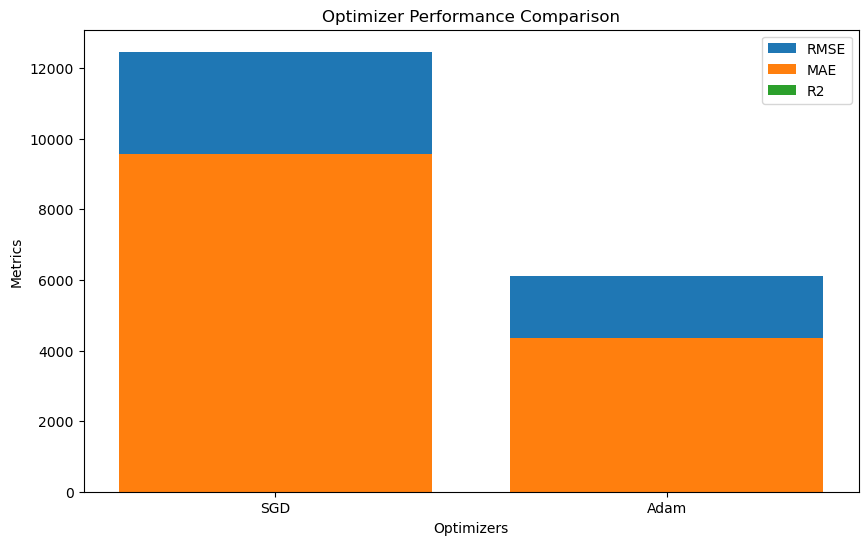

In [27]:
# Visualize Optimizer Results
optimizer_results_df = pd.DataFrame(optimizer_results)
plt.figure(figsize=(10, 6))
for metric in ["RMSE", "MAE", "R2"]:
    plt.bar(optimizer_results_df["Optimizer"], optimizer_results_df[metric], label=metric)
plt.xlabel("Optimizers")
plt.ylabel("Metrics")
plt.title("Optimizer Performance Comparison")
plt.legend()
plt.show()

In [28]:
# Save the best ANN model
best_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

best_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

best_model.save('best_ann_model.h5')

Epoch 1/100


C:\Users\LOKENDRA SINHA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 326106304.0000 - mae: 13254.6357 - val_loss: 323306496.0000 - val_mae: 12964.0908
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304790112.0000 - mae: 12926.2969 - val_loss: 322960864.0000 - val_mae: 12952.9316
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 301873248.0000 - mae: 13030.4180 - val_loss: 322067456.0000 - val_mae: 12926.1924
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 292183168.0000 - mae: 12617.4473 - val_loss: 320240704.0000 - val_mae: 12873.7812
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 324444096.0000 - mae: 13287.0508 - val_loss: 316878016.0000 - val_mae: 12781.3525
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 330121600.0000 - mae: 13337.1680 - val_loss: 311542304.0000 - val_mae: 12637.9307
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 286544800.0000 - mae: 12439.8740 - val_loss: 303856512.0000 - val_mae: 12432.8301
Epoch 8/100
34/34 ━━━━━━

In [29]:
# Comparative analysis
print("DNN Architecture Results:", pd.DataFrame(results))
print("Optimizer Results:", pd.DataFrame(optimizer_results))

DNN Architecture Results:               Architecture         RMSE          MAE        R2
0             [64, 32, 16]  5533.666458  3908.559551  0.802759
1            [128, 64, 32]  5311.252406  3600.704301  0.818295
2       [256, 128, 64, 32]  4629.116462  2782.413934  0.861972
3  [512, 256, 128, 64, 32]  4648.154372  2931.328431  0.860834
Optimizer Results:   Optimizer          RMSE          MAE        R2
0       SGD  12464.150194  9572.109451 -0.000685
1      Adam   6107.698166  4358.528000  0.759715
